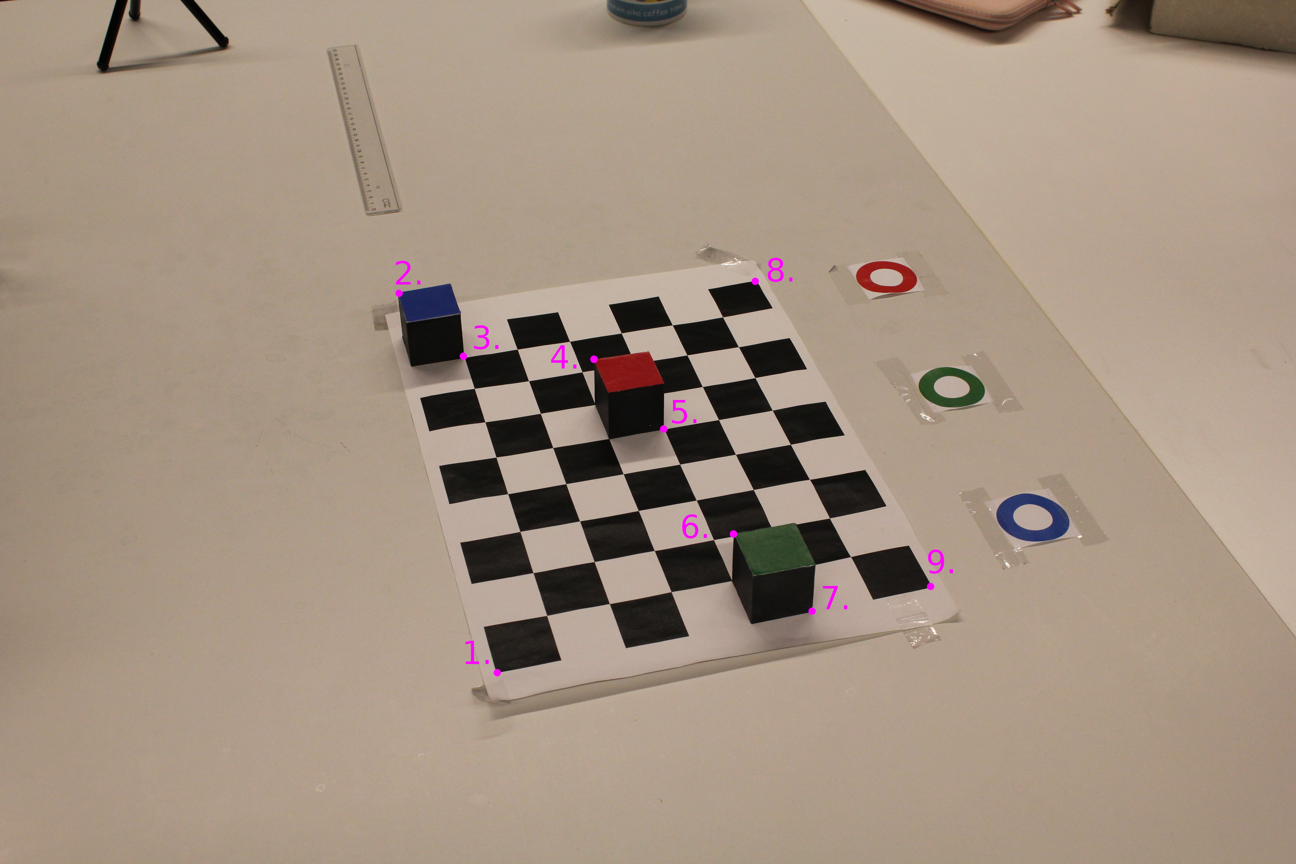

In [21]:
import numpy as np
import cv2 as cv
from PIL import Image

img = Image.open('./data/CALIB_ALEX_VEIKKA_SETUP.png')
w, h = img.size
new_size = (w // 4, h // 4)
img.thumbnail(new_size)

img

In [35]:
def load_img(path):
    img = Image.open(path)
    w, h = img.size
    new_size = (w // 4, h // 4)
    img.thumbnail(new_size)
    return img


def select_points(img):

    """
    Function to select points from an image.
    
    If you selected all the points you wanted, press ESC or close the window.
    """

    points = []

    img = np.array(img)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # load reference
    reference = load_img('./data/CALIB_ALEX_VEIKKA_SETUP.png')
    reference = np.array(reference)
    reference = cv.cvtColor(reference, cv.COLOR_BGR2RGB)

    # clip reference
    reference = reference[:, 350:]
    reference = reference[:, :650]
    
    img = np.concat((img, reference), 1)

    def click_event(event, x, y, flags, param):
        nonlocal points
        if event == cv.EVENT_LBUTTONDOWN:
            cv.circle(param, (x, y), 4, (255, 0, 255), -1)
            cv.imshow("Image", param)
            points.append((x, y))

    cv.imshow("Image", img)
    cv.setMouseCallback("Image", click_event, img)

    while True:
        key = cv.waitKey(20) & 0xFF
        if key == 27:  # ESC key to break
            break
        if cv.getWindowProperty("Image", cv.WND_PROP_VISIBLE) < 1:  # Check if window is closed
            break
    cv.destroyAllWindows()

    return np.stack(points)


img = load_img('./data/CALIB_ALEX_VEIKKA.png')
select_points(img)

array([[497, 672],
       [399, 293],
       [461, 313],
       [595, 361],
       [663, 383],
       [735, 534],
       [816, 565],
       [758, 282],
       [932, 588]])